In [19]:
#importing necessary libraries
#data analysis/manipulation
import numpy as np
import pandas as pd
#importing pandas datareader to get our data
import pandas_datareader as pdr
#importing the Augmented Dickey Fuller Test to check for cointegration
from statsmodels.tsa.api import adfuller
import matplotlib.pyplot as plt
import seaborn as sns

In [20]:
#setting start and end dates
start='2014-01-01'
end='2016-01-01'
#importing Walmart and Target using pandas datareader
wmt=pdr.get_data_yahoo('WMT',start,end)
tgt=pdr.get_data_yahoo('TGT',start,end)

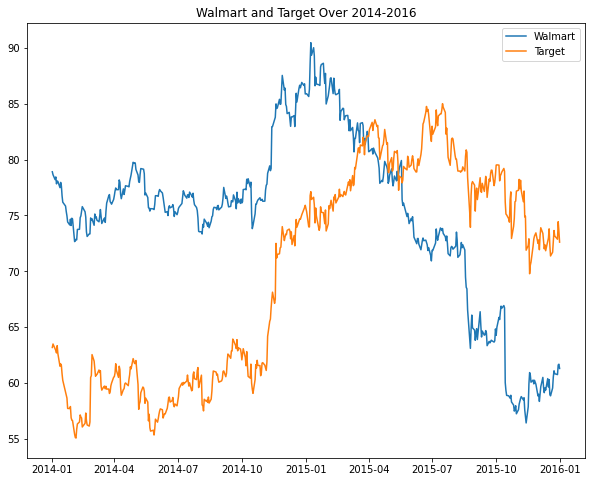

In [21]:
#Creating a figure to plot on
plt.figure(figsize=(10,8))
#Creating WMT and TGT plots
plt.plot(wmt["Close"],label='Walmart')
plt.plot(tgt['Close'],label='Target')
plt.title('Walmart and Target Over 2014-2016')
plt.legend(loc=0)
plt.show()

In [22]:
#initializing newDF as a pandas dataframe
newDF=pd.DataFrame()
#adding WMT closing prices as a column to the newDF
newDF['WMT']=wmt['Close']
#adding TGT closing prices as a column to the newDF
newDF['TGT']=tgt['Close']

In [23]:
newDF.head()

,WMT,TGT
Date,,
2014-01-02,78.910004,63.180000
2014-01-03,78.650002,63.490002
2014-01-06,78.209999,63.060001
2014-01-07,78.449997,62.910000
2014-01-08,77.830002,62.689999


<AxesSubplot:>

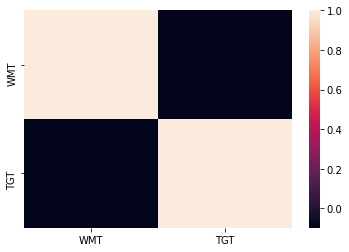

In [24]:
#using seaborn as sns to create a correlation heatmap of WMT and TGT
sns.heatmap(newDF.corr())

/home/user/Git/new_proj/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
No handles with labels found to put in legend.


<Figure size 1080x720 with 0 Axes>

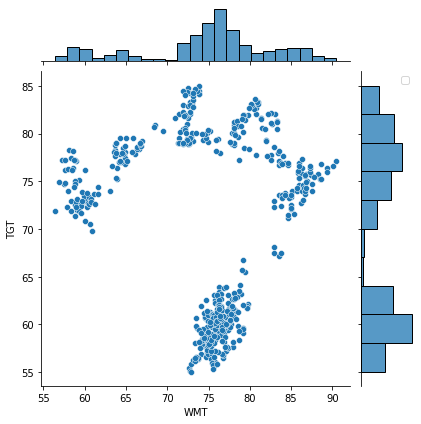

In [25]:
#Creating a scatter plot using Seaborn
plt.figure(figsize=(15,10))
sns.jointplot(newDF['WMT'],newDF['TGT'])
plt.legend(loc=0)
plt.show()

In [26]:
#adding the spread column to the nemDF dataframe
newDF['Spread']=newDF['WMT']-newDF['TGT']
#instantiating the adfuller test
adf=adfuller(newDF['Spread'])

In [28]:
#Logic that states if our test statistic is less than
#a specific critical value, then the pair is cointegrated at that
#level, else the pair is not cointegrated
if adf[0] < adf[4]['1%']:
    print('Spread is Cointegrated at 1% Significance Level')
elif adf[0] < adf[4]['5%']:
    print('Spread is Cointegrated at 5% Significance Level')
elif adf[0] < adf[4]['10%']:
    print('Spread is Cointegrated at 10% Significance Level')
else:
    print('Spread is not Cointegrated')

Spread is not Cointegrated


In [29]:
#printing out the results of the adf test
adf

(-0.3870682629949671,
 0.9122356273543268,
 0,
 503,
 {'1%': -3.4434175660489905,
  '5%': -2.8673031724657454,
  '10%': -2.5698395516760275},
 1190.4266742372913)

In [30]:
#importing dltr and dg
dltr=pdr.get_data_yahoo('DLTR',start, end)
dg=pdr.get_data_yahoo('DG',start, end)

In [31]:
#adding dltr and dg to our newDF dataframe
newDF['DLTR']=dltr['Close']
newDF['DG']=dg['Close']
#creating the dltr and dg spread as a column in our newDF dataframe
newDF['Spread_2']=newDF['DLTR']-newDF['DG']

In [32]:
newDF.head()


,WMT,TGT,Spread,DLTR,DG,Spread_2
Date,,,,,,
2014-01-02,78.910004,63.180000,15.730003,56.400002,61.200001,-4.799999
2014-01-03,78.650002,63.490002,15.160000,56.570000,60.980000,-4.410000
2014-01-06,78.209999,63.060001,15.149998,56.759998,59.610001,-2.850002
2014-01-07,78.449997,62.910000,15.539997,56.590000,59.889999,-3.299999
2014-01-08,77.830002,62.689999,15.140003,56.639999,59.700001,-3.060001


In [33]:
#Creating another adfuller instance
adf2=adfuller(newDF['Spread_2'])

In [34]:
if adf2[0] < adf2[4]['1%']:
    print('Spread is Cointegrated at 1% Significance Level')
elif adf2[0] < adf2[4]['5%']:
    print('Spread is Cointegrated at 5% Significance Level')
elif adf2[0] < adf2[4]['10%']:
    print('Spread is Cointegrated at 10% Significance Level')
else:
    print('Spread is not Cointegrated')

Spread is not Cointegrated


In [35]:
adf2

(-1.9620694865531636,
 0.3034478273403032,
 1,
 502,
 {'1%': -3.4434437319767452,
  '5%': -2.8673146875484368,
  '10%': -2.569845688481135},
 1305.4559187936732)

In [36]:
#importing necessary libraries
#data analysis and manipulation libraries
import numpy as np
import pandas as pd
#visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
#machine learning libraries
#the below line is far making fake data far illustration purposes
from sklearn.datasets import make_blobs

In [37]:
#creating fake data
data=make_blobs(n_samples=500, n_features=8,centers=5, cluster_std=1.5, random_state=201)

In [38]:
#Let's take a look at our fake data
data[0] #produces an array of our samples

array([[-8.71704845,  5.41481685,  0.80079153, ..., -6.75272811,
        -5.35441615, -7.54472844],
       [-6.69742504, -9.36091046,  4.76952742, ...,  4.50267649,
        -8.65187746,  7.32045219],
       [-8.24498976,  3.41616552,  0.59957377, ..., -6.06843425,
        -5.44945023, -7.63414447],
       ...,
       [-6.39216053, -3.36795039, 10.45021989, ..., -1.04434723,
        -5.1316052 ,  3.76141109],
       [ 6.00389682,  6.66533498, -3.59987442, ..., -1.64244834,
         6.9089689 , -4.24161932],
       [10.55759534,  5.59483822, -4.07524866, ..., -1.38497719,
         8.43095575, -1.08873693]])

In [39]:
#viewing the clusters of our data
data[1]

array([0, 1, 0, 2, 2, 3, 0, 4, 3, 3, 4, 3, 1, 2, 3, 0, 4, 4, 2, 4, 2, 1,
       4, 1, 2, 1, 2, 1, 4, 2, 1, 4, 0, 4, 2, 3, 4, 1, 0, 0, 3, 3, 1, 2,
       4, 2, 4, 3, 1, 3, 1, 4, 0, 3, 3, 0, 2, 1, 3, 2, 0, 3, 0, 3, 4, 4,
       2, 2, 4, 3, 0, 0, 1, 4, 3, 4, 1, 3, 4, 3, 2, 0, 4, 1, 0, 4, 0, 4,
       4, 2, 3, 4, 1, 4, 0, 3, 0, 4, 3, 2, 4, 2, 1, 3, 0, 2, 2, 0, 2, 2,
       2, 1, 4, 4, 4, 2, 2, 0, 2, 0, 4, 2, 1, 0, 3, 0, 2, 2, 3, 2, 0, 1,
       2, 1, 0, 2, 1, 0, 3, 2, 1, 1, 0, 1, 0, 3, 0, 0, 3, 2, 2, 4, 2, 4,
       1, 2, 1, 2, 4, 1, 1, 4, 3, 0, 0, 1, 1, 0, 4, 1, 2, 1, 4, 4, 3, 4,
       1, 0, 1, 1, 1, 1, 0, 4, 4, 4, 1, 0, 4, 3, 4, 2, 2, 4, 3, 3, 1, 3,
       0, 3, 0, 0, 4, 1, 4, 3, 3, 0, 4, 0, 3, 2, 0, 4, 3, 4, 1, 2, 4, 1,
       4, 1, 3, 3, 4, 2, 3, 2, 2, 3, 1, 4, 1, 1, 0, 3, 2, 4, 0, 4, 0, 0,
       0, 4, 2, 4, 2, 0, 1, 0, 1, 3, 4, 4, 4, 3, 1, 4, 1, 4, 2, 4, 3, 0,
       1, 3, 1, 3, 0, 0, 2, 3, 0, 1, 2, 1, 0, 2, 1, 1, 1, 0, 0, 2, 0, 3,
       2, 4, 1, 2, 0, 0, 1, 3, 4, 0, 1, 4, 3, 3, 0,

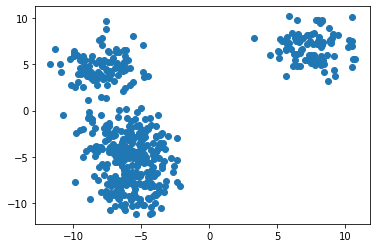

In [40]:
#creating a scatter plot of our data in features 1 and 2
plt.scatter(data[0][:,0],data[0][:,1])

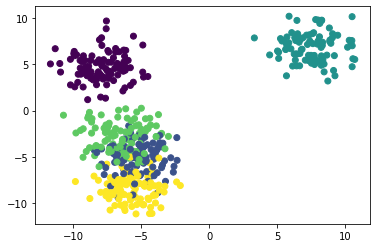

In [41]:
#the above plot doesn't give us much information
#Let's recreate it using our clusters
plt.scatter(data[0][:,0],data[0][:,1],c=data[1])

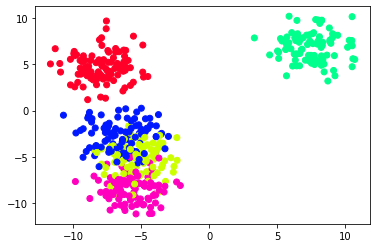

In [43]:
#we can improve the above visualization by adding a color map to our plot
plt.scatter(data[0][:,0],data[0][:,1],c=data[1],cmap='gist_rainbow')

In [44]:
#importing K-Means
from sklearn.cluster import KMeans

In [65]:
model= KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
n_clusters=5, n_init=10, n_jobs=1, precompute_distances='auto',
random_state=None, tol=0.0001, verbose=0)

In [70]:
model.fit(data[0])

/home/user/Git/new_proj/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:932: FutureWarning: 'precompute_distances' was deprecated in version 0.23 and will be removed in 0.25. It has no effect
  warnings.warn("'precompute_distances' was deprecated in version "
/home/user/Git/new_proj/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


KMeans(n_clusters=5, n_jobs=1, precompute_distances='auto')

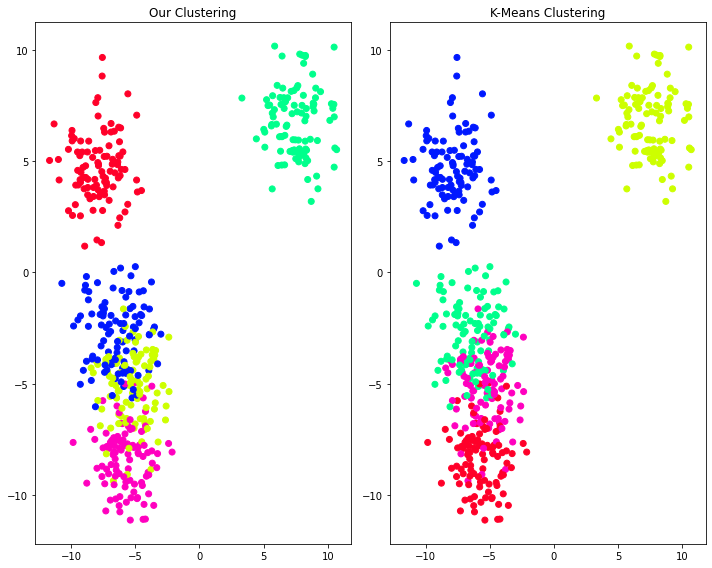

In [71]:
#now we can compare our clustered data to that of K-means
#creating subplots
plt.figure(figsize=(10,8))
plt.subplot(121)
plt.scatter(data[0][:,0],data[0][:,1],c=data[1],cmap='gist_rainbow')
#in the above line of code, we are simply replotting our clustered data
#based on already knowing the labels(i.e. c=data[1])
plt.title('Our Clustering')
plt.tight_layout()
plt.subplot(122)
plt.scatter(data[0][:,0],data[0][:,1],c=model.labels_,cmap='gist_rainbow')
#notice that the above line of code differs from the first in that
#c=model.labels_ instead of data[1]...this means that we will be plotting
#this second plot based on the clusters that our model predicted
plt.title('K-Means Clustering')
plt.tight_layout()
plt.show()

In [74]:
#Importing Our Stock Data From Excel
file=pd.ExcelFile('KMeansStocks.xlsx')
#Parsing the Sheet from Our Excel file
stockData=file.parse('Example')

FileNotFoundError: [Errno 2] No such file or directory: 'KMeansStocks.xlsx'

In [ ]:
#Looking at the head of our Stock Data
stockData.head()

In [ ]:
#Looking at the tail of our Stock Data
stockData.tail()

In [ ]:
#Making a copy of our stockdata
stockDataCopy=stockData.copy()
#Dropping the Name column from our stockData
stockDataCopy.drop('Name', inplace=True,axis=1)

In [ ]:
#Checking the head of our stockData
stockDataCopy.head()

In [ ]:
stockDataCopy.reindex(index=stockDataCopy['Symbol'],columns=stockDataCopy.columns)


In [ ]:
#Adding back the values to our Columns
stockDataCopy['Symbol']=stockData['Symbol'].values
stockDataCopy['Dividend Yield']=stockData['Dividend Yield'].values
stockDataCopy['P/E']=stockData['P/E'].values
stockDataCopy['EPS']=stockData['EPS'].values
stockDataCopy['MarketCap']=stockData['MarketCap'].values
stockDataCopy['EBITDA']=stockData['EBITDA'].values

In [ ]:
#Viewing the head of our stockDataCopy dataframe
stockDataCopy.head()

In [ ]:
stock_kmeans=KMeans()

In [ ]:
#creating an object to determine the value for K
class Get_K(object):
def __init__(self,start,stop,X):
self.start=start
self.stop=stop
self.X=X
#in our example, we found out that there were some NaN
#values in our data, thus we must fill those with 0
#before passing our features into our model
self.X=self.x.fillna(e)
def get_k(self):
#this method will iterate through different
#values of K and create the SSE
#initializing a list to hold our error terms
self.errors=[ ]
#intializing a range of values for K
Range=range(self.start,self.stop)
#iterating over range of values far K
#and calculating our errors
for i in Range:
self.k_means=KMeans(n_clusters=i)
self.k_means.fit(self.X)
self.errors.append(sum(np.min(cdist(self.X[0:200],self.k_means.cluster_centers_,'euclidean'),axis=1))/200)
return
 def plot_elbow(self):
with plt.style.context(['seaborn-notebook','ggplot‘]):
plt.figure(figsize=(10,8))
#we have multiple features, thus we will use the
#P/E to create our elbow
plt.plot(self.X['P/E'][0:200],self.errors[0:200])
plt.xlabel('Clusters')
plt.ylabel('Errors')
plt.title('K-Means Elbow Plot')
plt.tight_layout()
plt.show()

In [ ]:
features=stockDataCopy[['Dividend Yield','P/E','EPS','MarketCap','EBITDA']]


In [ ]:
#Creating an instance of our Get_K object
#we are setting our range of K from 1 to 266
#note we pass in the first 200 features values in this example
#this was done because otherwise, to plot our elbow, we would
#have to set our range max at 500. To avoid the computational
#time associated with the for loop inside our method
#we pass in a slice of the first 200 features
#this is also the reason we divide by 200 in our class
Find_K=Get_K(1, 200,features [1:200]

In [ ]:
#Calling get_k method on our Find_K object
Find_K.get_k()

In [ ]:
#Visualizing our K-Means Elbow Plot
Find_K.plot_elbow()